# Relatório Mestrado
**Orientador**: Vandilberto Pereira Pinto

**Mestrando**: Killdary Aguiar de Santana

## Introdução

A dissertação do mestrado propõe um Algorítmo Genético que solucione o problema do Caixeiro Viajante. O algorítmo até  a sua apresentação deverá possuir as seguintes funcionalidades:

* ~~Cálculo da menor rota~~;
* Criar funcionalidade de tanque, de modo a percorrer a rota e voltar ao ponto inicial sempre que o  tanque estiver perto de esvaziar;
* Múltiplos pontos de carregamento, o algoritmo devrá redirecionar o robô ao ponto de carregamento mais próximo;
* Adicionar peso aos pontos da rota, assim o algoritmo criara a rota com base nos pesoas e não distância;
* Divisão de rotas para múltiplos robôs;
* Integração com o Simulador VREP;
* Construção do Robô e integração com o algorítmo;
* Rotas com 3 dimenções, apara rotas de Drones;
* Adaptar solução ao Matlab e ao Scilab;
* Início da dissertação;

> Todas as etapas da pesquisa estão listadas acima, a acada nova funcionalidade desenvolvida será riscada representando como concluída. Novas funcionalidades só poderão ser acrescentadas caso o orientador aprove.

O algorímo será desenvolvida em **Pyton**, esta linguagem foi escolhida devido sua semelhanção ao *Matlab* e possibilita a encapsulação diretamente em um robô.


## Funcionamento

O algorítmo foi desenvolvido utilizando orientação a objetos(OO). A escolha da OO facilita a tarefa de acrescentar funcionalidades, facilitando sua manutenção e atualização.

## Dependências

O algoritimo utiliza de 2 bibliotecas em seu funcionamento:

* **Numpy**: Biblioteca matemática do python, sua sintaxe e funcionalidades foram baseadas no Matlab;
* **Matplotlib**: Biblioteca gpara gerar gráficos no python, será utilizada para representar a rota seguida pelo robô

> O Matlab já possui todas as funcionalidades das bibliotecas citadas acima

## Funcionalidade Tanque

Segundo o cronograma a próxima funcionalidade a ser desenvolvida será o acrescimo do tanque ao algorítimo. Para este propósito foi desenvolvido um novo método que recebe a rota calculada pelo algoritmo junto com o valor da distância máxima que o robô pode percorrer até a próxima recarga.

Primeiramente será calculado uma rota para 50 pontos as serem visitados. O algorítimo exige os seguintes parâmetros para seu funcionamento:
* **generation**: número de gerações que serão criadas pelo algorítmo;
* **population**: número de indivíduos que serão gerados a cada geração;
* **towns**: um arquivo de texto com todos os pontos a serem visitados, cada linha do arquivo deve ser uma cidade. Cada linha possui dois números que serão a localização do ponto em um plano cartesiano;

Abaixo será criado uma rota para os 50 pontos:

In [10]:
from AG_routes import CalulateRoutesTSP
import numpy as np

calc_rota = CalulateRoutesTSP()

custo_rota, rota = calc_rota.ga(generation=2500,
                                population=50,
                                towns='./pontos.txt')

print('Custo da menor Rota: {0} \nMenor Rota:{1}'.format(custo_rota, rota))

Custo da menor Rota: 59.666246407315995 
Menor Rota:[  9.  20.   3.  42.  26.  14.  29.  17.   2.  18.   1.  44.   4.  21.  38.
  34.  28.  41.  25.  12.  45.  37.  13.  46.   5.  15.  33.  31.  11.   8.
  10.  27.   7.  16.  32.  19.  40.  47.  30.  36.  48.  39.   6.  23.   0.
  22.  43.  49.  24.  35.   9.]


Gráfico apresentando a rota acima:

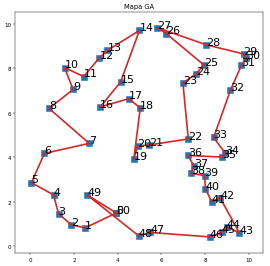

In [5]:
calc_rota.plota_rotas(calc_rota.mapa, rota)

Em posse da rota basta utilizar o método `tanque_rota`, esse método recebe os seguintes parâmetros:

* **rota**: rota que será seguida pelo robô;
* **tanque**: valor que representa a autonomia do robô antes de uma nova recarga;

> Até o momento o tanque representa a distância que o robô consegue se mover.

O algorítmo percorre a rota informada baseado no consumo do tanque, quando o tanque esteja próximo de acabar o mesmo redireciona o robô ao ponto de recarga, que neste caso será o ponto inicial.

O método `tanque_rota` realiza as seguintes etapas:

1. Saindo do ponto inicial é verificado se o robô possui tanque suficiente para ir para a próxima cidade e se o mesmo consegue voltar ao ponto de recarga. Essa ação é necessária para determinar se o robô consegue voltar ao pono de recarga;
1. Caso o robô consiga ir apenas ao próximo ponto e não consiga ir ao ponto de recarga, ou ainda na localização atual ele não tenha energia suficiente para chegar ao próximo ponto, o mesmo é enviado ao ponto de recarga;
1. Caso o robô não possua carga para retornar ao ponto de recarga, o mesmo estaciona no último ponto visitado;

Abaixo a utilização do método `tanque rota` com 3 valores de tanques e seus respectivos gráficos:

### Tanque com valor 10

In [7]:
custo_rota_tanque_10, rota_tanque_10 = calc_rota.tanque_rota(rota, 10)

print('Custo: {0} \nRota:{1}'.format(custo_rota_tanque_10, rota_tanque_10))

5.62249062953 5.62249062953 0.0 10
Custo: 18.878764698238054 
Rota:[43, 0, 23, 6, 39, 48, 43, 36, 30, 43]


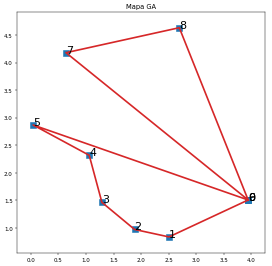

In [11]:
calc_rota.plota_rotas(calc_rota.mapa, np.array(rota_tanque_10, dtype=np.int32))

Na rota calculada acima o algoritmo só percorreu 10 pontos, já que foi determinado que não há tanque para visitar a próxima cidade, assim ele coloca o agente no ponto de recarga, para preservá-lo.

### Tanque com valor 20

In [12]:
custo_rota_tanque_20, rota_tanque_20 = calc_rota.tanque_rota(rota, 20)

print('Custo: {0} \nRota:{1}'.format(custo_rota_tanque_20, rota_tanque_20))

10.3287667332 10.3287667332 0.0 20
Custo: 116.2766145723432 
Rota:[9, 20, 3, 42, 26, 14, 29, 17, 2, 18, 1, 44, 4, 21, 38, 34, 28, 9, 41, 25, 12, 45, 37, 13, 46, 5, 9, 15, 33, 9, 31, 9, 11, 8, 9, 10, 9]


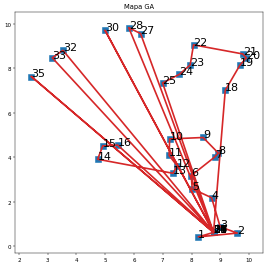

In [13]:
calc_rota.plota_rotas(calc_rota.mapa, np.array(rota_tanque_20, dtype=np.int32))

Na rota com tanque valor 20 fram visitadas mais cidades, porém ainda assim existe distâncias que o algoritimo determinou que não possui tanque suficiente para sair do ponto de recarga e voltar ao mesmos, sendo assim o agente é colocado no ponto de recarga, para preservá-lo.

### Tanque com valor 30

In [17]:
custo_rota_tanque_30, rota_tanque_30 = calc_rota.tanque_rota(rota, 30)

print('Custo: {0} \nRota:{1}'.format(custo_rota_tanque_30, rota_tanque_30))

0.0 0.0 0.0 30
Custo: 108.5032409026573 
Rota:[9, 20, 3, 42, 26, 14, 29, 17, 2, 18, 1, 44, 4, 21, 38, 34, 28, 41, 25, 12, 45, 9, 37, 13, 46, 5, 15, 33, 31, 11, 8, 10, 27, 7, 9, 16, 32, 19, 40, 47, 30, 36, 9, 48, 39, 6, 23, 0, 22, 43, 49, 24, 35, 9]


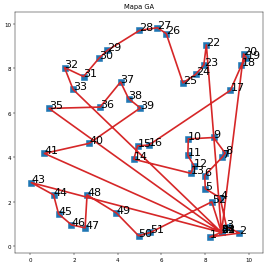

In [18]:
calc_rota.plota_rotas(calc_rota.mapa, np.array(rota_tanque_30, dtype=np.int32))

Com o valor 30 o algoritimo conseguiu traçar uma rota que percorreu todos os pontos, visitando o ponto de recarga 4 vezes no total.

## Conclusão

A funcionalidade consegue calcular a rota, baseada em um tanque, porém para um melhor aproveitamento será necessário adicionar multiplos pontos de recarga.